# Q2

pg15-19

In [1]:
pi.fun <- function(i){
      out <- 0
      if(i > 1) out <- 1/(i+1)^3
      out
}

In [5]:
N <- 20000
X <- numeric(N)
current.state <- 50 # initialize the markov chain

for (n in 1:N){
      i <- current.state
      P <- c(min( pi.fun(i-2) / pi.fun(i), 1),
            min( pi.fun(i-1) / pi.fun(i), 1),
            min( pi.fun(i+1) / pi.fun(i), 1),
            min( pi.fun(i+2) / pi.fun(i), 1)) / 6
      P0 <- 1 - sum(P)
      P <- c(P[1:2], P0, P[3:4])
      transition <- sample(seq(-2,2,1), size = 1, prob = P)
      current.state <- current.state + transition
      X[n] <- current.state
}

In [6]:
n <- 1000
observedDist <- table(X[-c(1:n)])
observedDist/(N-n)


           1            2            3            4            5            6 
0.6358947368 0.1823684211 0.0781578947 0.0343157895 0.0193157895 0.0125789474 
           7            8            9           10           11           12 
0.0093684211 0.0056842105 0.0048421053 0.0036315789 0.0031052632 0.0033157895 
          13           14           15           16           17           18 
0.0019473684 0.0014210526 0.0012631579 0.0012105263 0.0007368421 0.0005263158 
          19           20 
0.0002105263 0.0001052632 

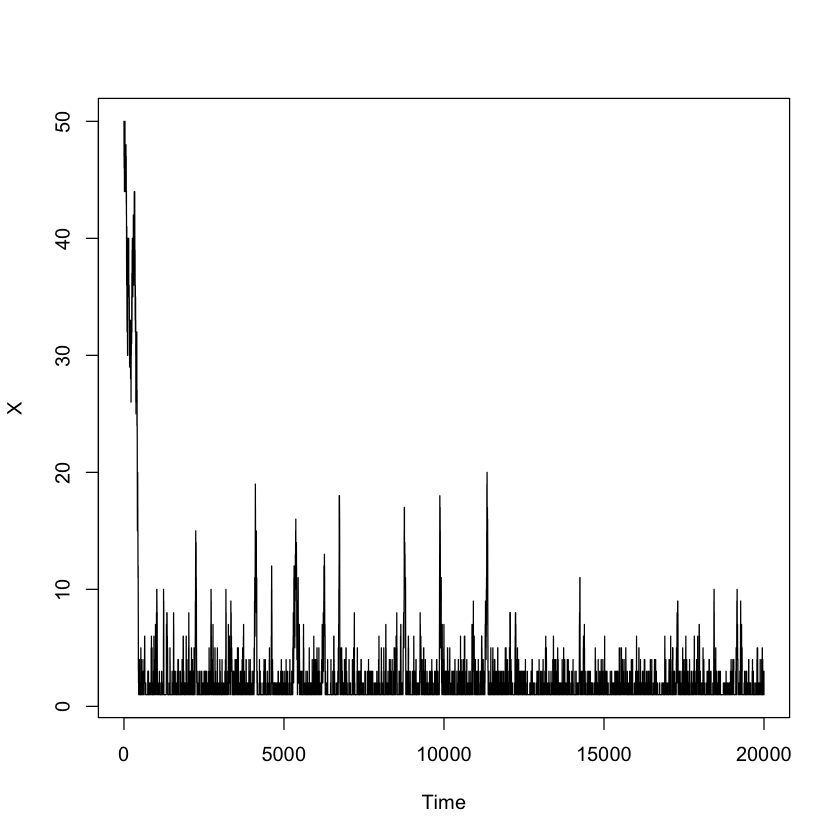

In [7]:
ts.plot(X)

In [9]:
# estimate K
# pi2 <- k/(2+1)^3 = k/27
k <- observedDist[2]/19000*27
k

2 
4.923947

# Q5

Re-run the MCMC example from above(Q4), using a starting value of 625 and a λ value of 1/625.

Adjust the scale so that you get an acceptance rate of around 40%. How does the posterior distribution look now

In [18]:
install.packages('LearnBayes')


The downloaded binary packages are in
	/var/folders/xb/ck19r6wj3s34sw5xpnr7_fbm0000gp/T//RtmpLNXMRU/downloaded_packages


### Original code for Q4


In [32]:
logNormExp <- function(sigma2, datapar) { 
      X <- datapar$data 
      lambda <- datapar$lambda
      loglike <- dnorm(X, sd=sqrt(abs(sigma2)), log = TRUE)
      logprior <- dexp(sigma2, rate = lambda, log = TRUE) 
      return(loglike + logprior)
}

data <- -25 
start <- matrix(300, nrow=1)  #using a starting value of 625
datapar <- list(data=data, lambda=1/10)

m <- 10000 
varcov <- matrix(1, nrow=1) 
proposal <- list(var=varcov, scale = 50)

s <- rwmetrop(logNormExp, proposal, start, m, datapar)

cat("The acceptance rate should be an intermediate value:", s$accept)

The acceptance rate should be an intermediate value: 0.3749

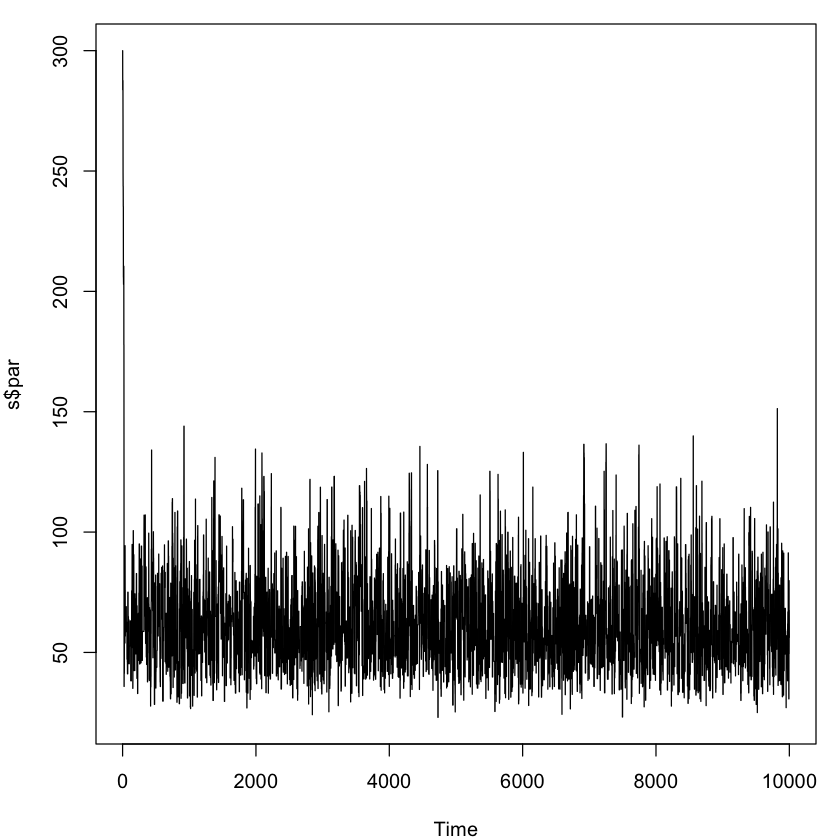

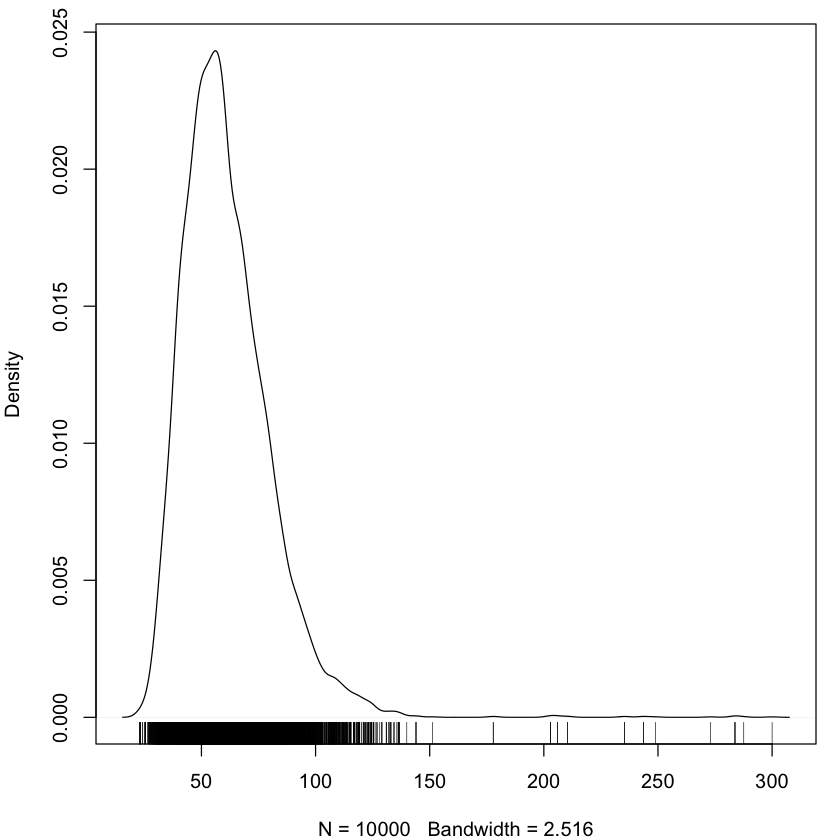

In [33]:
par(mar=c(4, 4, 1, 1)) 
ts.plot(s$par)

par(mar=c(4, 4, 1, 1)) 
plot(density(s$par), main = " ") 
rug(s$par)

### Change the start=625 and theta=1/625

In [37]:
library(LearnBayes)

logNormExp <- function(sigma2, datapar) { 
      X <- datapar$data 
      lambda <- datapar$lambda
      loglike <- dnorm(X, sd=sqrt(abs(sigma2)), log = TRUE)
      logprior <- dexp(sigma2, rate = lambda, log = TRUE) 
      return(loglike + logprior)
}

data <- -25 
start <- matrix(625, nrow=1)  #using a starting value of 625
datapar <- list(data=data, lambda=1/625)

m <- 10000 
varcov <- matrix(1, nrow=1) 
proposal <- list(var=varcov, scale = 40) # Adjust the scale so that you get an acceptance rate of around 40%

s <- rwmetrop(logNormExp, proposal, start, m, datapar)

cat("The acceptance rate should be an intermediate value:", s$accept)

The acceptance rate should be an intermediate value: 0.9637

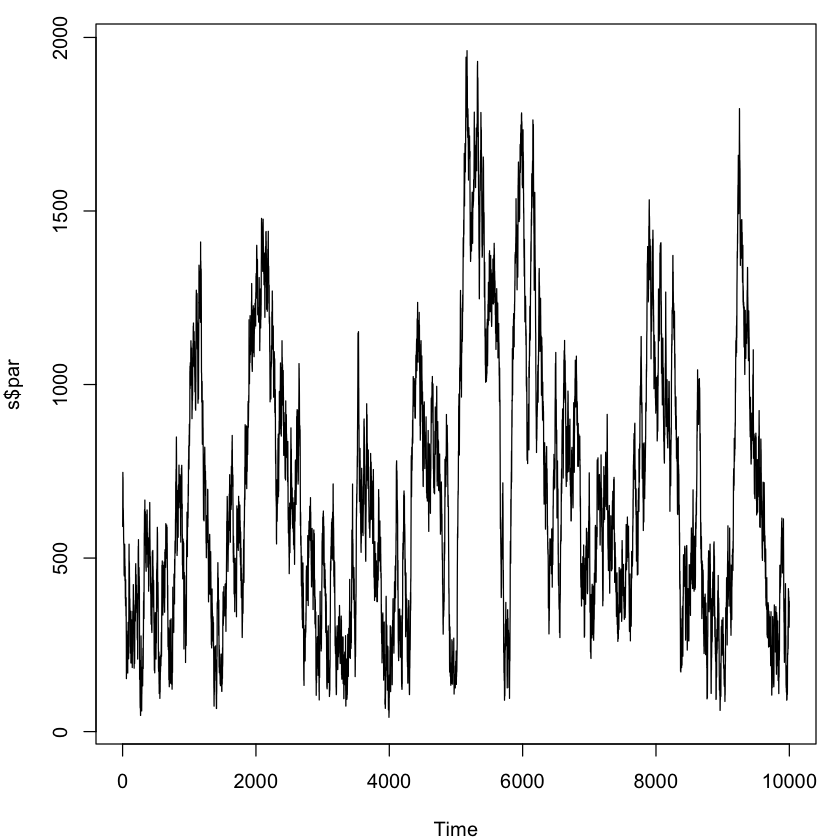

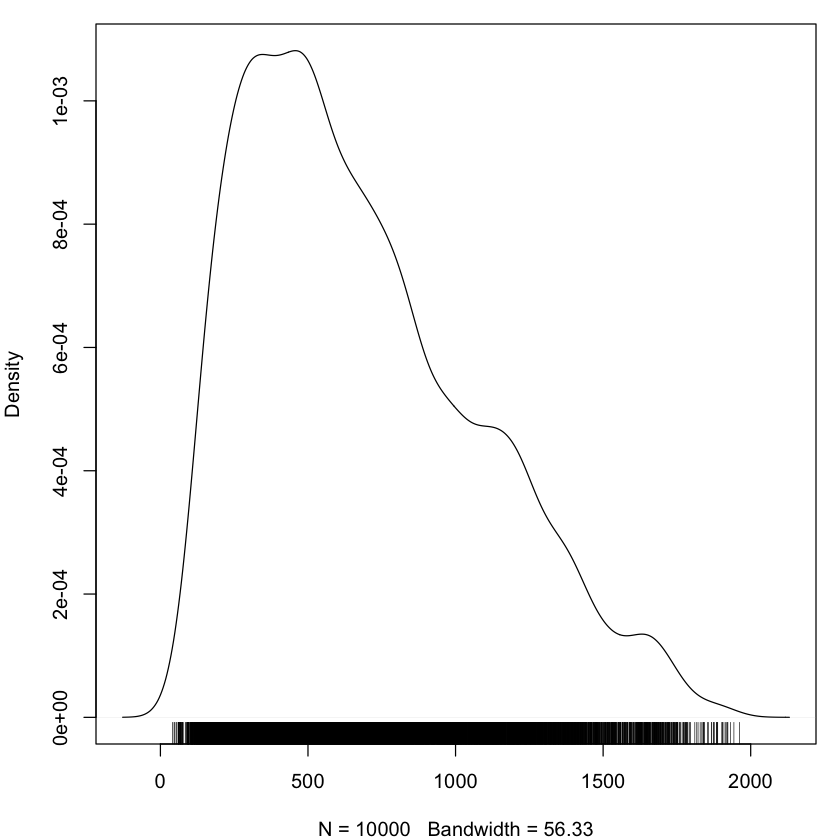

In [38]:
par(mar=c(4, 4, 1, 1)) 
ts.plot(s$par)

par(mar=c(4, 4, 1, 1)) 
plot(density(s$par), main = " ") 
rug(s$par)

# Q6(part g)